In [1]:
'''
#direct from db
!pip install requests
!pip install pmdarima
!pip install statsmodels
!pip install beautifulsoup4

from bs4 import BeautifulSoup
import requests
import pandas as pd

url = 'https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/'
ext = 'gz'

def listdb(url, ext=''):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'html.parser')
    return [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]

bigdf = pd.DataFrame()
for file in listdb(url, ext):
    print(file)
    data = pd.read_csv(file, compression='gzip', error_bad_lines=False)
    bigdf = pd.concat([bigdf,data],ignore_index=True)
bigdf.to_csv('events_datasets.csv', index=False)
'''

"\n#direct from db\n!pip install requests\n!pip install pmdarima\n!pip install statsmodels\n!pip install beautifulsoup4\n\nfrom bs4 import BeautifulSoup\nimport requests\nimport pandas as pd\n\nurl = 'https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/'\next = 'gz'\n\ndef listdb(url, ext=''):\n    page = requests.get(url).text\n    soup = BeautifulSoup(page, 'html.parser')\n    return [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]\n\nbigdf = pd.DataFrame()\nfor file in listdb(url, ext):\n    print(file)\n    data = pd.read_csv(file, compression='gzip', error_bad_lines=False)\n    bigdf = pd.concat([bigdf,data],ignore_index=True)\nbigdf.to_csv('events_datasets.csv', index=False)\n"

In [2]:
import pandas as pd
bigdf=pd.read_csv('events_datasets.csv', low_memory=False)

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
bigdf.describe(include='all')

,AZIMUTH,BEGIN_AZIMUTH,BEGIN_DATE_TIME,BEGIN_DAY,BEGIN_LAT,BEGIN_LOCATION,BEGIN_LON,BEGIN_RANGE,BEGIN_TIME,BEGIN_YEARMONTH,CATEGORY,CZ_FIPS,CZ_NAME,CZ_TIMEZONE,CZ_TYPE,DAMAGE_CROPS,DAMAGE_PROPERTY,DATA_SOURCE,DEATHS_DIRECT,DEATHS_INDIRECT,END_AZIMUTH,END_DATE_TIME,END_DAY,END_LAT,END_LOCATION,END_LON,END_RANGE,END_TIME,END_YEARMONTH,EPISODE_ID,EPISODE_NARRATIVE,EVENT_ID,EVENT_NARRATIVE,EVENT_TYPE,EVENT_YEARMONTH,FATALITY_AGE,FATALITY_DATE,FATALITY_ID,FATALITY_LOCATION,FATALITY_SEX,FATALITY_TYPE,FAT_DAY,FAT_TIME,FAT_YEARMONTH,FLOOD_CAUSE,INJURIES_DIRECT,INJURIES_INDIRECT,LAT2,LATITUDE,LOCATION,LOCATION_INDEX,LON2,LONGITUDE,MAGNITUDE,MAGNITUDE_TYPE,MONTH_NAME,RANGE,SOURCE,STATE,STATE_FIPS,TOR_F_SCALE,TOR_LENGTH,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,TOR_OTHER_CZ_STATE,TOR_OTHER_WFO,TOR_WIDTH,WFO,YEAR,YEARMONTH
count,855423,637847,1572907,1.572907e+06,973131.000000,888755,973131.00000,856567.000000,1.572907e+06,1.572907e+06,326.000000,1.572907e+06,1571350,1572907,1572907,945313,1057663,1572904,1.572907e+06,1.572907e+06,624766,1572907,1.572907e+06,795641.000000,849399,795642.000000,856190.000000,1.572907e+06,1.572907e+06,2.624202e+06,1093799,2.874150e+06,753910,1572907,17686.000000,14873.000000,17699,1.770900e+04,16310,15673,17709,17709.000000,17709.000000,17709.000000,82116,1.572907e+06,1.572907e+06,8.111270e+05,1.021864e+06,1085596,1.283534e+06,8.111270e+05,1.021864e+06,919483.000000,368478,1572907,855423.000000,1227042,1572906,1.572906e+06,68421,265067.000000,2242.000000,2242,2242,2242,265067.000000,1447334,1.572907e+06,1.283534e+06
unique,16,30,847367,NaN,NaN,60716,NaN,NaN,NaN,NaN,NaN,NaN,5312,26,3,1163,2815,4,NaN,NaN,23,836477,NaN,NaN,49591,NaN,NaN,NaN,NaN,NaN,195626,NaN,637131,74,NaN,NaN,6022,NaN,20,2,2,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,50284,NaN,NaN,NaN,NaN,6,12,NaN,73,68,NaN,13,NaN,NaN,807,40,90,NaN,541,NaN,NaN
top,N,N,01-JUL-12 00:00:00,NaN,NaN,COUNTYWIDE,NaN,NaN,NaN,NaN,NaN,NaN,WASHINGTON,CST,C,0.00K,0.00K,CSV,NaN,NaN,N,31-JUL-12 23:59:00,NaN,NaN,COUNTYWIDE,NaN,NaN,NaN,NaN,NaN,Scattered severe thunderstorms in advance of a...,NaN,Trees down.,Thunderstorm Wind,NaN,NaN,08/28/2005 11:00:00,NaN,Vehicle/Towed Trailer,M,D,NaN,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,COUNTYWIDE,NaN,NaN,NaN,NaN,EG,June,NaN,Trained Spotter,TEXAS,NaN,F0,NaN,NaN,MADISON,AL,JAN,NaN,LWX,NaN,NaN
freq,162829,149082,1163,NaN,NaN,19665,NaN,NaN,NaN,NaN,NaN,NaN,13280,472442,1047741,646631,477321,837788,NaN,NaN,138274,1107,NaN,NaN,19717,NaN,NaN,NaN,NaN,NaN,302,NaN,1455,439899,NaN,NaN,982,NaN,3698,10324,15178,NaN,NaN,NaN,73811,NaN,NaN,NaN,NaN,19776,NaN,NaN,NaN,NaN,248845,245406,NaN,146306,127794,NaN,20773,NaN,NaN,23,215,168,NaN,38501,NaN,NaN
mean,NaN,NaN,NaN,1.502380e+01,37.826869,NaN,-91.00032,2.369750,1.324173e+03,2.004225e+05,1.417178,9.420447e+01,NaN,NaN,NaN,NaN,NaN,NaN,1.159573e-02,1.609758e-03,NaN,NaN,1.634918e+01,37.879971,NaN,-92.639658,2.310655,1.482619e+03,2.004225e+05,6.554702e+05,NaN,3.164888e+06,NaN,NaN,493553.363904,49.247832,NaN,7.200876e+05,NaN,NaN,NaN,16.490203,182.391383,200515.641199,NaN,9.669357e-02,8.441058e-03,2.825577e+06,3.782336e+01,NaN,1.464768e+00,6.793208e+06,-9.080147e+01,25.509517,NaN,NaN,3.037507,NaN,NaN,3.169504e+01,NaN,0.880079,104.596789,NaN,NaN,NaN,32.300247,NaN,2.004166e+03,2.007587e+05
std,NaN,NaN,NaN,9.094250e+00,4.896884,NaN,10.11825,6.121546,6.672449e+02,1.171727e+03,0.981778,1.110319e+02,NaN,NaN,NaN,NaN,NaN,NaN,6.308769e-01,6.127630e-02,NaN,NaN,9.100214e+00,4.920073,NaN,37.261054,4.696355,6.045282e+02,1.171727e+03,1.555403e+06,NaN,3.750443e+06,NaN,NaN,385459.838709,23.615029,NaN,1.967826e+07,NaN,NaN,NaN,9.318740,492.485703,1167.821816,NaN,3.943533e+00,2.024586e+00,1.624625e+06,5.039043e+00,NaN,1.032690e+00,3.916964e+06,1.127002e+01,36.240104,NaN,NaN,5.093701,NaN,NaN,1.717132e+01,NaN,8.088094,83.353683,NaN,NaN,NaN,128.115840,NaN,1.171798e+01,6.557057e+02
min,NaN,NaN,NaN,1.000000e+00,-14.400000,NaN,-171.03270,0.000000,0.000000e+00,1.950010e+05,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,1.000000e+

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

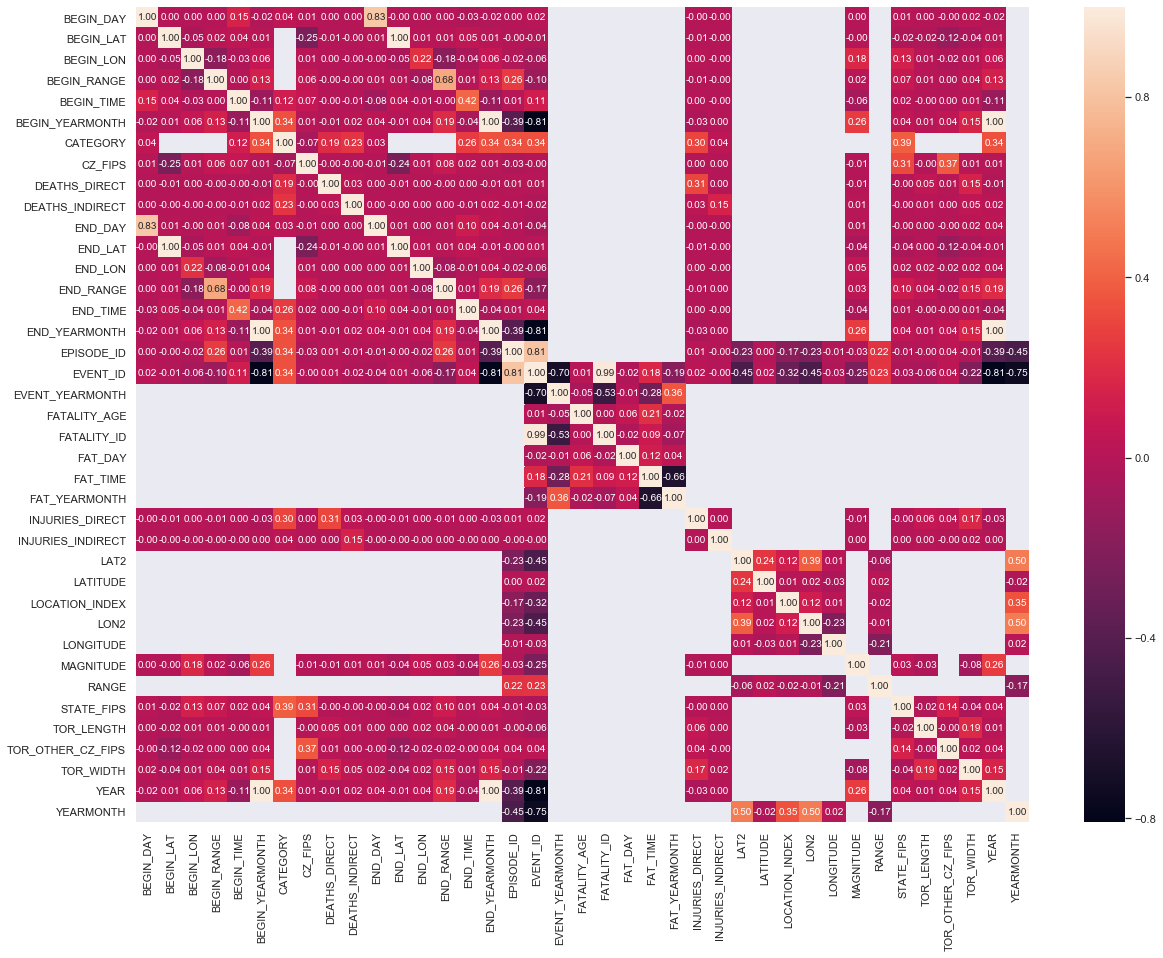

In [6]:
plt.figure(figsize=(20, 15))
sns.heatmap(bigdf.corr(), annot=True, fmt=".2f")

In [7]:
bigdf['YEAR'] = pd.to_datetime(bigdf['YEAR'],format='%Y')
bigdf['END_YEARMONTH'] = pd.to_datetime(bigdf['END_YEARMONTH'], format='%Y%m')
bigdf['BEGIN_YEARMONTH'] = pd.to_datetime(bigdf['BEGIN_YEARMONTH'], format='%Y%m')
bigdf.head()

,AZIMUTH,BEGIN_AZIMUTH,BEGIN_DATE_TIME,BEGIN_DAY,BEGIN_LAT,BEGIN_LOCATION,BEGIN_LON,BEGIN_RANGE,BEGIN_TIME,BEGIN_YEARMONTH,CATEGORY,CZ_FIPS,CZ_NAME,CZ_TIMEZONE,CZ_TYPE,DAMAGE_CROPS,DAMAGE_PROPERTY,DATA_SOURCE,DEATHS_DIRECT,DEATHS_INDIRECT,END_AZIMUTH,END_DATE_TIME,END_DAY,END_LAT,END_LOCATION,END_LON,END_RANGE,END_TIME,END_YEARMONTH,EPISODE_ID,EPISODE_NARRATIVE,EVENT_ID,EVENT_NARRATIVE,EVENT_TYPE,EVENT_YEARMONTH,FATALITY_AGE,FATALITY_DATE,FATALITY_ID,FATALITY_LOCATION,FATALITY_SEX,FATALITY_TYPE,FAT_DAY,FAT_TIME,FAT_YEARMONTH,FLOOD_CAUSE,INJURIES_DIRECT,INJURIES_INDIRECT,LAT2,LATITUDE,LOCATION,LOCATION_INDEX,LON2,LONGITUDE,MAGNITUDE,MAGNITUDE_TYPE,MONTH_NAME,RANGE,SOURCE,STATE,STATE_FIPS,TOR_F_SCALE,TOR_LENGTH,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,TOR_OTHER_CZ_STATE,TOR_OTHER_WFO,TOR_WIDTH,WFO,YEAR,YEARMONTH
0,NaN,NaN,28-APR-50 14:45:00,28.0,35.12,NaN,-99.20,0.0,1445.0,1950-04-01,NaN,149.0,WASHITA,CST,C,0,250K,PUB,0.0,0.0,NaN,28-APR-50 14:45:00,28.0,35.17,NaN,-99.20,0.0,1445.0,1950-04-01,NaN,NaN,10096222,NaN,Tornado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,April,NaN,NaN,OKLAHOMA,40.0,F3,3.4,NaN,NaN,NaN,NaN,400.0,NaN,1950-01-01,NaN
1,NaN,NaN,29-APR-50 15:30:00,29.0,31.90,NaN,-98.60,0.0,1530.0,1950-04-01,NaN,93.0,COMANCHE,CST,C,0,25K,PUB,0.0,0.0,NaN,29-APR-50 15:30:00,29.0,31.73,NaN,-98.60,0.0,1530.0,1950-04-01,NaN,NaN,10120412,NaN,Tornado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,April,NaN,NaN,TEXAS,48.0,F1,11.5,NaN,NaN,NaN,NaN,200.0,NaN,1950-01-01,NaN
2,NaN,NaN,05-JUL-50 18:00:00,5.0,40.58,NaN,-75.70,0.0,1800.0,1950-07-01,NaN,77.0,LEHIGH,CST,C,0,25K,PUB,0.0,0.0,NaN,05-JUL-50 18:00:00,5.0,40.65,NaN,-75.47,0.0,1800.0,1950-07-01,NaN,NaN,10104927,NaN,Tornado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,July,NaN,NaN,PENNSYLVANIA,42.0,F2,12.9,NaN,NaN,NaN,NaN,33.0,NaN,1950-01-01,NaN
3,NaN,NaN,05-JUL-50 18:30:00,5.0,40.60,NaN,-76.75,0.0,1830.0,1950-07-01,NaN,43.0,DAUPHIN,CST,C,0,2.5K,PUB,0.0,0.0,NaN,05-JUL-50 18:30:00,5.0,NaN,NaN,NaN,0.0,1830.0,1950-07-01,NaN,NaN,10104928,NaN,Tornado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,July,NaN,NaN,PENNSYLVANIA,42.0,F2,0.0,NaN,NaN,NaN,NaN,13.0,NaN,1950-01-01,NaN
4,NaN,NaN,24-JUL-50 14:40:00,24.0,41.63,NaN,-79.68,0.0,1440.0,1950-07-01,NaN,39.0,CRAWFORD,CST,C,0,2.5K,PUB,0.0,0.0,NaN,24-JUL-50 14:40:00,24.0,NaN,NaN,NaN,0.0,1440.0,1950-07-01,NaN,NaN,10104929,NaN,Tornado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,July,NaN,NaN,PENNSYLVANIA,42.0,F0,0.0,NaN,NaN,NaN,NaN,33.0,NaN,1950-01-01,NaN


In [8]:
bigdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2874150 entries, 0 to 2874149
Data columns (total 70 columns):
AZIMUTH               object
BEGIN_AZIMUTH         object
BEGIN_DATE_TIME       object
BEGIN_DAY             float64
BEGIN_LAT             float64
BEGIN_LOCATION        object
BEGIN_LON             float64
BEGIN_RANGE           float64
BEGIN_TIME            float64
BEGIN_YEARMONTH       datetime64[ns]
CATEGORY              float64
CZ_FIPS               float64
CZ_NAME               object
CZ_TIMEZONE           object
CZ_TYPE               object
DAMAGE_CROPS          object
DAMAGE_PROPERTY       object
DATA_SOURCE           object
DEATHS_DIRECT         float64
DEATHS_INDIRECT       float64
END_AZIMUTH           object
END_DATE_TIME         object
END_DAY               float64
END_LAT               float64
END_LOCATION          object
END_LON               float64
END_RANGE             float64
END_TIME              float64
END_YEARMONTH         datetime64[ns]
EPISODE_ID      

In [9]:
bigdf.nunique()

AZIMUTH                    16
BEGIN_AZIMUTH              30
BEGIN_DATE_TIME        847367
BEGIN_DAY                  31
BEGIN_LAT              106938
BEGIN_LOCATION          60716
BEGIN_LON              135773
BEGIN_RANGE               153
BEGIN_TIME               1440
BEGIN_YEARMONTH           830
CATEGORY                    5
CZ_FIPS                   596
CZ_NAME                  5312
CZ_TIMEZONE                26
CZ_TYPE                     3
DAMAGE_CROPS             1163
DAMAGE_PROPERTY          2815
DATA_SOURCE                 4
DEATHS_DIRECT              55
DEATHS_INDIRECT            15
END_AZIMUTH                23
END_DATE_TIME          836477
END_DAY                    31
END_LAT                114358
END_LOCATION            49591
END_LON                147570
END_RANGE                 148
END_TIME                 1440
END_YEARMONTH             830
EPISODE_ID             329536
EPISODE_NARRATIVE      195626
EVENT_ID              1572916
EVENT_NARRATIVE        637131
EVENT_TYPE

In [10]:
print('\n'.join(["{0}: {1}".format(col,bigdf[col].unique().tolist()) for col in bigdf.columns.tolist() if len(bigdf[col].unique().tolist()) < 100]))

AZIMUTH: [nan, 'S', 'WSW', 'WNW', 'SE', 'N', 'SW', 'W', 'NE', 'E', 'NW', 'SSW', 'NNW', 'ENE', 'ESE', 'SSE', 'NNE']
BEGIN_AZIMUTH: [nan, 'S', 'W', 'SE', 'SW', 'E', 'N', 'NW', 'NE', 'WNW', 'WSW', 'ENE', 'SSW', 'NNW', 'SSE', 'ESE', 'NNE', 'mi', 'to', 'Ne', 'Se', 'Wes', 'EE', 'nnw', 'sw', 'M', 'Eas', 'th', 'nd', 'SES', 'WSWNW']
BEGIN_DAY: [28.0, 29.0, 5.0, 24.0, 4.0, 15.0, 16.0, 1.0, 22.0, 27.0, 2.0, 3.0, 7.0, 26.0, 11.0, 12.0, 14.0, 9.0, 19.0, 8.0, 18.0, 13.0, 21.0, 20.0, 30.0, 31.0, 25.0, 10.0, 6.0, 23.0, 17.0, nan]
CATEGORY: [nan, 1.0, 2.0, 4.0, 5.0, 3.0]
CZ_TIMEZONE: ['CST', 'MST', 'EST', 'PST', 'UNK', 'CDT', 'EDT', 'MDT', 'GMT', 'HST', 'PDT', 'CSt', 'AST', 'CSC', 'ESt', 'SCT', 'SST', 'CST-6', 'PST-8', 'EST-5', 'MST-7', 'HST-10', 'AKST-9', 'AST-4', 'SST-11', 'GST10', nan]
CZ_TYPE: ['C', 'Z', 'M', nan]
DATA_SOURCE: ['PUB', nan, 'CSV', 'PDC', 'PDS']
DEATHS_DIRECT: [0.0, 1.0, 5.0, 3.0, 2.0, 9.0, 6.0, 7.0, 50.0, 29.0, 4.0, 17.0, 10.0, 23.0, 11.0, 38.0, 90.0, 116.0, 12.0, 13.0, 114.0, 18.0,

In [11]:
rawfilterdf = bigdf[bigdf["STATE"]=="TEXAS"]
filterdf = rawfilterdf.drop_duplicates()
print(rawfilterdf.shape,filterdf.shape)
rawfilterdf.to_csv('texas_area.csv', index=False)

(127794, 70) (127794, 70)


In [12]:
filterdf['EVENT_TYPE'].value_counts()

Hail                         46755
Thunderstorm Wind            30212
Drought                      12168
Flash Flood                  11329
Tornado                       9324
High Wind                     3632
Winter Weather                2455
Winter Storm                  1504
Flood                         1455
Heavy Snow                    1234
Wildfire                      1138
Heat                           907
Lightning                      843
Ice Storm                      778
Heavy Rain                     763
Funnel Cloud                   654
Cold/Wind Chill                450
Frost/Freeze                   425
Strong Wind                    235
Excessive Heat                 234
Dense Fog                      217
Tropical Storm                 215
Dust Storm                     164
Blizzard                       155
Extreme Cold/Wind Chill         88
Coastal Flood                   71
Storm Surge/Tide                58
Sleet                           57
Hurricane (Typhoon) 

In [13]:
pd.isnull(filterdf).any()

AZIMUTH                True
BEGIN_AZIMUTH          True
BEGIN_DATE_TIME       False
BEGIN_DAY             False
BEGIN_LAT              True
BEGIN_LOCATION         True
BEGIN_LON              True
BEGIN_RANGE            True
BEGIN_TIME            False
BEGIN_YEARMONTH       False
CATEGORY               True
CZ_FIPS               False
CZ_NAME                True
CZ_TIMEZONE           False
CZ_TYPE               False
DAMAGE_CROPS           True
DAMAGE_PROPERTY        True
DATA_SOURCE           False
DEATHS_DIRECT         False
DEATHS_INDIRECT       False
END_AZIMUTH            True
END_DATE_TIME         False
END_DAY               False
END_LAT                True
END_LOCATION           True
END_LON                True
END_RANGE              True
END_TIME              False
END_YEARMONTH         False
EPISODE_ID             True
EPISODE_NARRATIVE      True
EVENT_ID              False
EVENT_NARRATIVE        True
EVENT_TYPE            False
EVENT_YEARMONTH        True
FATALITY_AGE        

In [14]:
thunderdf = filterdf[filterdf["EVENT_TYPE"].str.contains("Thunderstorm Wind")]
thunderdf = thunderdf.groupby(['YEAR','EVENT_TYPE'])['END_DAY'].count()
thunderdf = thunderdf.reset_index(['EVENT_TYPE'])
thunderdf = thunderdf.rename(columns={'END_DAY':'NUMBER_OF_EVENTS'})
#print(filterdf.shape, ttdf.shape)
thunderdf = thunderdf.drop(['EVENT_TYPE'],axis=1)
print(thunderdf)


            NUMBER_OF_EVENTS
YEAR                        
1955-01-01                73
1956-01-01                69
1957-01-01                92
1958-01-01               121
1959-01-01                73
1960-01-01                64
1961-01-01                91
1962-01-01                98
1963-01-01               100
1964-01-01               103
1965-01-01               102
1966-01-01                92
1967-01-01                73
1968-01-01               128
1969-01-01               110
1970-01-01               101
1971-01-01               125
1972-01-01               106
1973-01-01               146
1974-01-01               128
1975-01-01               165
1976-01-01               145
1977-01-01                93
1978-01-01               160
1979-01-01               254
1980-01-01               279
1981-01-01               289
1982-01-01               325
1983-01-01               375
1984-01-01               241
1985-01-01               292
1986-01-01               328
1987-01-01    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([711858., 715510., 719163., 722815., 726468., 730120., 733773.,
        737425., 741078.]), <a list of 9 Text xticklabel objects>)

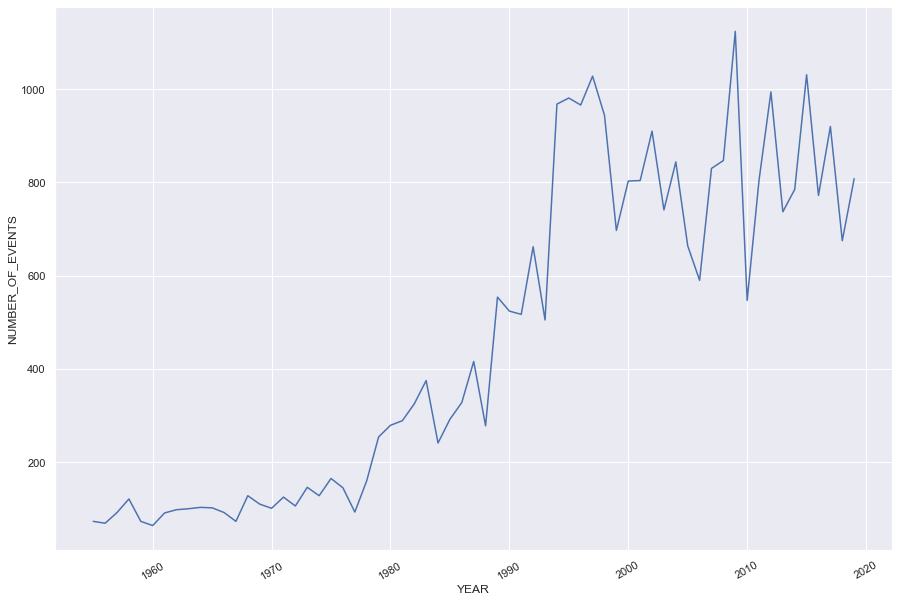

In [15]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=thunderdf.index, y="NUMBER_OF_EVENTS", data=thunderdf)
plt.xticks(rotation=30)

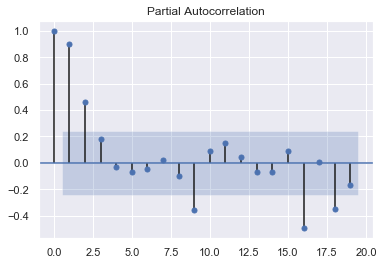

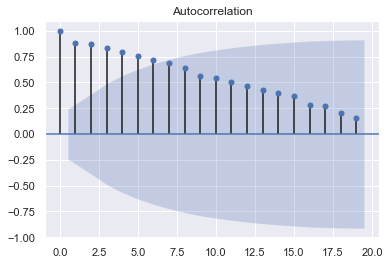

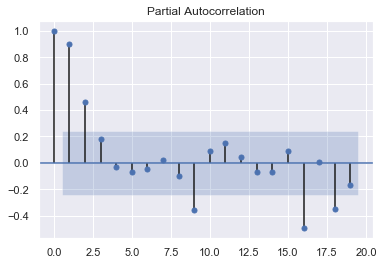

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(thunderdf)
plot_pacf(thunderdf)

In [17]:
'''
p = AR
d = I
q = MA
AR = (1,0,0)
ARMA = (1,0,1)
ARIMA = (1,1,1)
'''
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from pmdarima.arima import auto_arima

trainthunder=thunderdf[:int(0.85*(len(thunderdf)))]
validthunder=thunderdf[int(0.85*(len(thunderdf))):]

In [18]:
model_ar = ARIMA(trainthunder['NUMBER_OF_EVENTS'], dates=trainthunder.index, order=(1, 0, 0)).fit()
yhat = model_ar.predict(len(trainthunder['NUMBER_OF_EVENTS']), len(trainthunder['NUMBER_OF_EVENTS']))
print(yhat)
pred_ar = model_ar.forecast(steps=len(validthunder['NUMBER_OF_EVENTS']))
print(pred_ar)

2010-01-01    1098.599376
Freq: AS-JAN, dtype: float64
(array([1098.59937562, 1074.22200842, 1050.82667677, 1028.37381964,
       1006.82546969,  986.14518911,  966.29800796,  947.25036505,
        928.97005122,  911.42615481]), array([115.15404416, 159.60589002, 191.63351837, 216.99002638,
       237.96628139, 255.7690779 , 271.13421225, 284.55325342,
       296.37587389, 306.86242807]), array([[ 872.90159639, 1324.29715485],
       [ 761.40021225, 1387.04380459],
       [ 675.23188254, 1426.42147101],
       [ 603.08118293, 1453.66645634],
       [ 540.42012864, 1473.23081075],
       [ 484.84700807, 1487.44337016],
       [ 434.88471697, 1497.71129895],
       [ 389.53623666, 1504.96449345],
       [ 348.08401251, 1509.85608992],
       [ 309.98684758, 1512.86546203]]))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [19]:
model_ma = ARIMA(trainthunder['NUMBER_OF_EVENTS'], dates=trainthunder.index, order=(0, 0, 1)).fit()
yhat = model_ma.predict(len(trainthunder['NUMBER_OF_EVENTS']), len(trainthunder['NUMBER_OF_EVENTS']))
print(yhat)
pred_ma = model_ma.forecast(steps=len(validthunder['NUMBER_OF_EVENTS']))
print(pred_ma)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


2010-01-01    809.257434
Freq: AS-JAN, dtype: float64
(array([809.25743403, 407.08536691, 407.08536691, 407.08536691,
       407.08536691, 407.08536691, 407.08536691, 407.08536691,
       407.08536691, 407.08536691]), array([218.06599389, 276.94809844, 276.94809844, 276.94809844,
       276.94809844, 276.94809844, 276.94809844, 276.94809844,
       276.94809844, 276.94809844]), array([[ 381.85593975, 1236.65892831],
       [-135.72293163,  949.89366544],
       [-135.72293163,  949.89366544],
       [-135.72293163,  949.89366544],
       [-135.72293163,  949.89366544],
       [-135.72293163,  949.89366544],
       [-135.72293163,  949.89366544],
       [-135.72293163,  949.89366544],
       [-135.72293163,  949.89366544],
       [-135.72293163,  949.89366544]]))


In [20]:
model_arma = ARIMA(trainthunder['NUMBER_OF_EVENTS'], dates=trainthunder.index, order=(1, 0, 1)).fit()
yhat = model_arma.predict(len(trainthunder['NUMBER_OF_EVENTS']), len(trainthunder['NUMBER_OF_EVENTS']))
print(yhat)
pred_arma = model_arma.forecast(steps=len(validthunder['NUMBER_OF_EVENTS']))
print(pred_arma)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


2010-01-01    1032.113292
Freq: AS-JAN, dtype: float64
(array([1032.11329165, 1021.90934059, 1011.90268888, 1002.08952161,
        992.46609766,  983.02874822,  973.77387544,  964.69795102,
        955.7975149 ,  947.06917389]), array([110.89812055, 136.53218112, 157.29200137, 174.94829931,
       190.39008398, 204.14163561, 216.54434102, 227.83606863,
       238.19094787, 247.74134015]), array([[ 814.75696941, 1249.46961388],
       [ 754.31118287, 1289.50749831],
       [ 703.61603114, 1320.18934662],
       [ 659.1971558 , 1344.98188743],
       [ 619.30839005, 1365.62380527],
       [ 582.91849469, 1383.13900176],
       [ 549.35476599, 1398.19298489],
       [ 518.14746213, 1411.24843992],
       [ 488.95183563, 1422.64319417],
       [ 461.50506972, 1432.63327807]]))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


In [21]:
model_arima = ARIMA(trainthunder['NUMBER_OF_EVENTS'], dates=trainthunder.index, order=(1, 1, 1)).fit()
yhat = model_arima.predict(len(trainthunder['NUMBER_OF_EVENTS']), len(trainthunder['NUMBER_OF_EVENTS']), typ='levels')
print(yhat)
pred_arima = model_arima.forecast(steps=len(validthunder['NUMBER_OF_EVENTS']))
print(pred_arima)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


2010-01-01    1051.941859
Freq: AS-JAN, dtype: float64
(array([1051.94185856, 1106.16769773, 1110.31643992, 1134.32293153,
       1150.45496085, 1169.70955733, 1187.72591997, 1206.23329624,
       1224.54596423, 1242.93584253]), array([107.28692415, 128.02677182, 153.50943354, 172.56038941,
       190.68915804, 206.87744913, 222.02076252, 236.14555756,
       249.49051589, 262.15000834]), array([[ 841.66335122, 1262.2203659 ],
       [ 855.23983592, 1357.09555955],
       [ 809.4434789 , 1411.18940095],
       [ 796.11078312, 1472.53507994],
       [ 776.71107884, 1524.19884285],
       [ 764.23720782, 1575.18190684],
       [ 752.5732216 , 1622.87861834],
       [ 743.39650831, 1669.07008417],
       [ 735.55353859, 1713.53838986],
       [ 729.13126764, 1756.74041742]]))


In [22]:
validthunder['NUMBER_OF_EVENTS_AR']=pred_ar[0]
validthunder['NUMBER_OF_EVENTS_MA']=pred_ma[0]
validthunder['NUMBER_OF_EVENTS_ARMA']=pred_arma[0]
validthunder['NUMBER_OF_EVENTS_ARIMA']=pred_arima[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

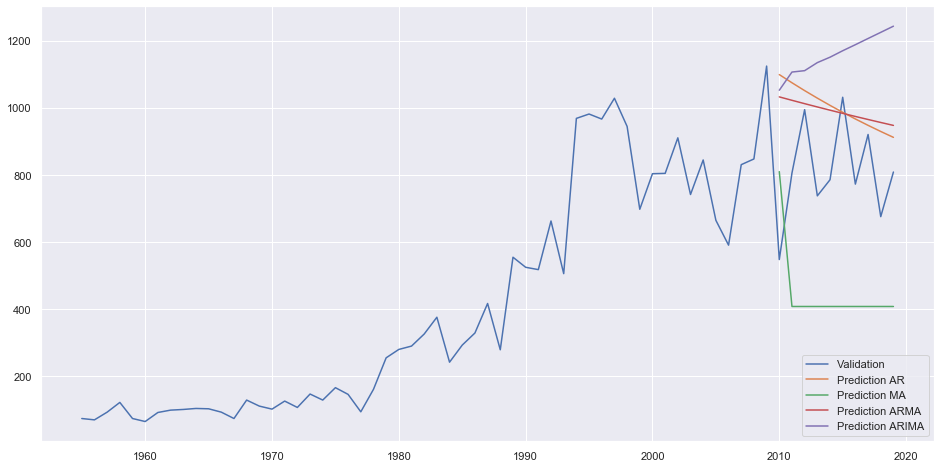

In [23]:
plt.figure(figsize=(16,8))
plt.plot(thunderdf['NUMBER_OF_EVENTS'], label='Validation')
plt.plot(validthunder['NUMBER_OF_EVENTS_AR'], label='Prediction AR')
plt.plot(validthunder['NUMBER_OF_EVENTS_MA'], label='Prediction MA')
plt.plot(validthunder['NUMBER_OF_EVENTS_ARMA'], label='Prediction ARMA')
plt.plot(validthunder['NUMBER_OF_EVENTS_ARIMA'], label='Prediction ARIMA')
plt.legend(loc='lower right')

In [24]:
model_auto = auto_arima(trainthunder, trace=True, error_action='ignore', suppress_warnings=True).fit(trainthunder)
pred_auto = model_auto.predict(n_periods=len(validthunder))
validthunder['NUMBER_OF_EVENTS_AUTO']=pred_auto

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=663.849, BIC=675.783, Fit time=0.155 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=669.034, BIC=673.012, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=664.355, BIC=670.322, Fit time=0.018 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=665.279, BIC=671.246, Fit time=0.028 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=667.950, BIC=677.895, Fit time=0.068 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=664.839, BIC=678.762, Fit time=0.169 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=668.312, BIC=678.257, Fit time=0.063 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=662.185, BIC=676.108, Fit time=0.155 seconds
Fit ARIMA: order=(3, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=664.095, BIC=681.995, Fit time=0.200 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
validthunder

,NUMBER_OF_EVENTS,NUMBER_OF_EVENTS_AR,NUMBER_OF_EVENTS_MA,NUMBER_OF_EVENTS_ARMA,NUMBER_OF_EVENTS_ARIMA,NUMBER_OF_EVENTS_AUTO
YEAR,,,,,,
2010-01-01,547,1098.599376,809.257434,1032.113292,1051.941859,1105.317972
2011-01-01,805,1074.222008,407.085367,1021.909341,1106.167698,1153.548235
2012-01-01,994,1050.826677,407.085367,1011.902689,1110.316440,1100.824734
2013-01-01,737,1028.373820,407.085367,1002.089522,1134.322932,1047.247192
2014-01-01,785,1006.825470,407.085367,992.466098,1150.454961,1048.225482
2015-01-01,1031,986.145189,407.085367,983.028748,1169.709557,1091.896863
2016-01-01,772,966.298008,407.085367,973.773875,1187.725920,1138.773087
2017-01-01,920,947.250365,407.085367,964.697951,1206.233296,1164.778778
2018-01-01,675,928.970051,407.085367,955.797515,1224.545964,1172.877873


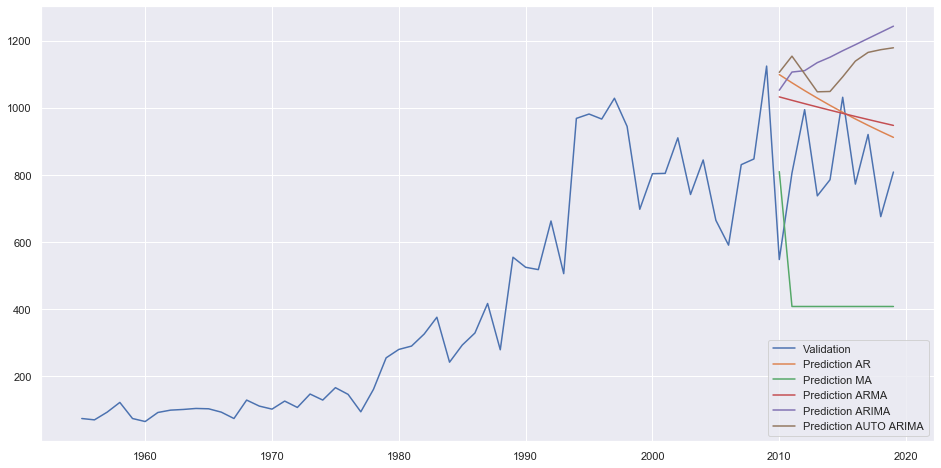

In [26]:
plt.figure(figsize=(16,8))
plt.plot(thunderdf['NUMBER_OF_EVENTS'], label='Validation')
plt.plot(validthunder['NUMBER_OF_EVENTS_AR'], label='Prediction AR')
plt.plot(validthunder['NUMBER_OF_EVENTS_MA'], label='Prediction MA')
plt.plot(validthunder['NUMBER_OF_EVENTS_ARMA'], label='Prediction ARMA')
plt.plot(validthunder['NUMBER_OF_EVENTS_ARIMA'], label='Prediction ARIMA')
plt.plot(validthunder['NUMBER_OF_EVENTS_AUTO'], label='Prediction AUTO ARIMA')
plt.legend(loc='lower right')